In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

from load_data import unpickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def get_accuracy(predictions, actual):
    difference = predictions - actual
    number_predictions = predictions.shape[0]
    number_incorrect = np.count_nonzero(difference)
    number_correct = number_predictions - number_incorrect
    accuracy = number_correct / number_predictions
    return accuracy

In [3]:
data = unpickle("data/data_batch_1")

In [4]:
X, y = data[b'data'], data[b'labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
accuracies = []
times = []

for number_neighbors in range(1, 14):
    classifier = KNeighborsClassifier(n_neighbors=number_neighbors)
    classifier.fit(X_train, y_train)

    start_time = time.time()
    y_predict = classifier.predict(X_test)
    end_time = time.time()
    
    accuracy = get_accuracy(y_predict, y_test)
    accuracies.append(accuracy)
    
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

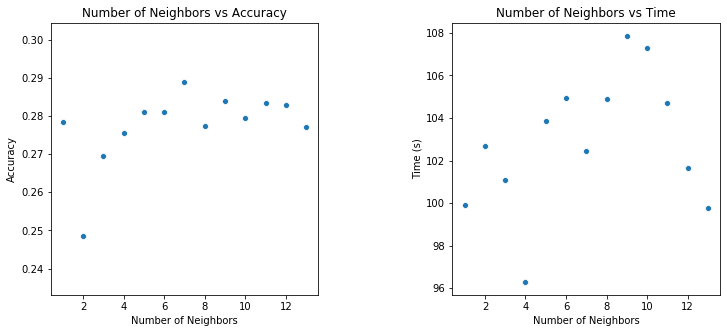

In [26]:
neighbors = np.arange(1, 14)

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
accuracy_plot = sns.scatterplot(x=neighbors, y=accuracies, ax=axes[0])
accuracy_plot.set(
    title="Number of Neighbors vs Accuracy", 
    xlabel="Number of Neighbors",
    ylabel="Accuracy"
)

time_plot = sns.scatterplot(x=neighbors, y=times, ax=axes[1])
time_plot.set(
    title="Number of Neighbors vs Time", 
    xlabel="Number of Neighbors",
    ylabel="Time (s)"
)

plt.subplots_adjust(wspace=0.5)
plt.show()